## Costo Unitario de Producción - Método por Absorción - 2
---

Calcular el Costo Unitario de Producción según el Método por Absorción:

*Datos de la Empresa:*

* Existencia Inicial de PT: 1.000
* Unidades fabricadas en el mes: 500
* Unidades vendidas en el mes: 800

* Consumos de Producción - por unidad

    - Materia Prima: $ 45
    - Mano de Obra Directa: $ 25
    - CIF Variables: $ 60

* Costos de Estructura Mensuales: $ 550.000
---

**Método  por absorción:** 
Este método considera todos los costos de producción (tanto fijos como variables) para determinar el costo de cada unidad. La resolución tiene dos partes clave:

- Cálculo del Costo Unitario de Producción: Se determina el costo de fabricar una sola unidad, incluyendo la porción correspondiente de los costos fijos de estructura.

- Valoración del Inventario de Productos Terminados: Se calcula el valor de las unidades que quedaron en stock al final del período.

### Importaciones y configuración

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Configuración de estilo para los gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

### Definición de Datos

In [59]:
datos_absorcion = {
    'inventario_inicial_pt': 1000,
    'unidades_fabricadas': 500,
    'unidades_vendidas': 800,
    'costos_variables_por_unidad': {
        'materia_prima': 45,
        'mano_obra_directa': 25,
        'cif_variables': 60
    },
    'costos_estructura_mensuales': 550000
}

#### 1. Cálculo del Costo Unitario de Producción (Método por Absorción)

Este método incluye tanto los costos de producción variables como los costos fijos.

- **Fórmula del CIF Fijo por Unidad**

Para asignar los costos fijos a cada unidad, se divide el total de los costos de estructura por el número de unidades fabricadas en el período:
​
\begin{align*}
CIF_{\text{Fijo por Unidad}} = 
\frac{\text{Costos de Estructura Mensuales}}{\text{Unidades Fabricadas}} \\
\\
\end{align*}

- **Fórmula del Costo Unitario por Absorción**
El costo unitario se obtiene al sumar todos los costos de producción, tanto los variables como el CIF Fijo por unidad recién calculado.

\begin{align*}
CU_{\text{Absorción}} = 
\text{Materia Prima} + \text{Mano de Obra Directa} + \text{CIF Variables} + CIF_{\text{Fijo por Unidad}}\\
\\
\end{align*}

In [60]:
# Cálculo del Costo Unitario de Producción (Método Absorción)
def calcular_costo_absorcion_unitario(datos):
    """Calcula el costo unitario de producción según el método por absorción"""
    
    # Costo variable por unidad
    costo_variable_unitario = (datos['costos_variables_por_unidad']['materia_prima'] +
                               datos['costos_variables_por_unidad']['mano_obra_directa'] +
                               datos['costos_variables_por_unidad']['cif_variables'])
    
    # Costos variables totales
    costos_variables_totales = costo_variable_unitario * datos['unidades_fabricadas']
    
    # Costo fijo unitario
    costo_fijo_unitario = datos['costos_estructura_mensuales'] / datos['unidades_fabricadas']
    
    # Costo unitario por absorción
    costo_absorcion_unitario = costo_variable_unitario + costo_fijo_unitario
    
    # Crear DataFrame con los cálculos
    df_costo = pd.DataFrame({
        'Concepto': [
            'Materia Prima por unidad',
            'Mano de Obra Directa por unidad',
            'CIF Variables por unidad',
            'COSTO VARIABLE UNITARIO',
            'Costos de Estructura Mensuales',
            'Unidades Producidas',
            'COSTO FIJO UNITARIO',
            'COSTO UNITARIO POR ABSORCIÓN'
        ],
        'Cálculo': [
            'Dato',
            'Dato',
            'Dato',
            '45 + 25 + 60',
            'Dato',
            'Dato',
            f"{datos['costos_estructura_mensuales']:,.0f} ÷ {datos['unidades_fabricadas']}",
            f"{costo_variable_unitario:,.0f} + {costo_fijo_unitario:,.0f}"
        ],
        'Valor': [
            f"${datos['costos_variables_por_unidad']['materia_prima']}",
            f"${datos['costos_variables_por_unidad']['mano_obra_directa']}",
            f"${datos['costos_variables_por_unidad']['cif_variables']}",
            f"${costo_variable_unitario:,.2f}",
            f"${datos['costos_estructura_mensuales']:,.0f}",
            f"{datos['unidades_fabricadas']} unidades",
            f"${costo_fijo_unitario:,.2f}",
            f"${costo_absorcion_unitario:,.2f}"
        ]
    })
    
    return costo_absorcion_unitario, costo_variable_unitario, costo_fijo_unitario, df_costo


In [61]:
costo_absorcion_unitario, costo_variable_unitario, costo_fijo_unitario, df_costo = calcular_costo_absorcion_unitario(datos_absorcion)

print("\n1. CÁLCULO DEL COSTO UNITARIO POR ABSORCIÓN")
try:
    from IPython.display import display
    display(df_costo.style.hide(axis="index"))
except:
    print(df_costo)


1. CÁLCULO DEL COSTO UNITARIO POR ABSORCIÓN


Concepto,Cálculo,Valor
Materia Prima por unidad,Dato,$45
Mano de Obra Directa por unidad,Dato,$25
CIF Variables por unidad,Dato,$60
COSTO VARIABLE UNITARIO,45 + 25 + 60,$130.00
Costos de Estructura Mensuales,Dato,"$550,000"
Unidades Producidas,Dato,500 unidades
COSTO FIJO UNITARIO,"550,000 ÷ 500","$1,100.00"
COSTO UNITARIO POR ABSORCIÓN,"130 + 1,100","$1,230.00"


#### 2. Valoración del Inventario de Productos Terminados

Para determinar el valor total del inventario final, primero se calcula la cantidad de unidades en stock y luego se multiplica por el costo unitario por absorción.

- **Fórmula de Unidades en Inventario Final**

El inventario final es el resultado de sumar las unidades iniciales y las fabricadas, y luego restar las vendidas:

\begin{align*}
U_{\text{Inventario Final}} = 
\left( \text{Existencia Inicial de PT} + \text{Unidades Fabricadas} \right) - \text{Unidades Vendidas} \\
\\
\end{align*}


- **Fórmula del Valor del Inventario**

El valor monetario del inventario se obtiene multiplicando las unidades en stock por el costo de producción de cada una:

\begin{align*}
V_{\text{Inventario}} = U_{\text{Inventario Final}} \times CU_{\text{Absorción}} \\
\\
\end{align*}


In [62]:
# Cálculo del Inventario de Productos Terminados
def calcular_inventario_productos_terminados(datos, costo_unitario):
    """Calcula el valor del inventario de productos terminados"""
    
    # Unidades en inventario final
    unidades_inventario_final = (datos['inventario_inicial_pt'] + 
                                 datos['unidades_fabricadas'] - 
                                 datos['unidades_vendidas'])
    
    # Valor del inventario
    valor_inventario = unidades_inventario_final * costo_unitario
    
    # DataFrame con los cálculos
    df_inventario = pd.DataFrame({
        'Concepto': [
            'Inventario Inicial PT',
            'Unidades Fabricadas',
            'Unidades Vendidas',
            'UNIDADES INVENTARIO FINAL',
            'Costo Unitario por Absorción',
            'VALOR INVENTARIO PRODUCTOS TERMINADOS'
        ],
        'Cálculo': [
            'Dato',
            'Dato',
            'Dato',
            f"{datos['inventario_inicial_pt']} + {datos['unidades_fabricadas']} - {datos['unidades_vendidas']}",
            'Calculado anteriormente',
            f"{unidades_inventario_final} × {costo_unitario:,.2f}"
        ],
        'Valor': [
            f"{datos['inventario_inicial_pt']} unidades",
            f"{datos['unidades_fabricadas']} unidades",
            f"{datos['unidades_vendidas']} unidades",
            f"{unidades_inventario_final} unidades",
            f"${costo_unitario:,.2f}",
            f"${valor_inventario:,.0f}"
        ]
    })
    
    return valor_inventario, unidades_inventario_final, df_inventario


In [63]:
valor_inventario, unidades_inventario_final, df_inventario = calcular_inventario_productos_terminados(datos_absorcion, costo_absorcion_unitario)

print("\n2. CÁLCULO DEL INVENTARIO DE PRODUCTOS TERMINADOS")
try:
    from IPython.display import display
    display(df_inventario.style.hide(axis="index"))
except:
    print(df_inventario)



2. CÁLCULO DEL INVENTARIO DE PRODUCTOS TERMINADOS


Concepto,Cálculo,Valor
Inventario Inicial PT,Dato,1000 unidades
Unidades Fabricadas,Dato,500 unidades
Unidades Vendidas,Dato,800 unidades
UNIDADES INVENTARIO FINAL,1000 + 500 - 800,700 unidades
Costo Unitario por Absorción,Calculado anteriormente,"$1,230.00"
VALOR INVENTARIO PRODUCTOS TERMINADOS,"700 × 1,230.00","$861,000"


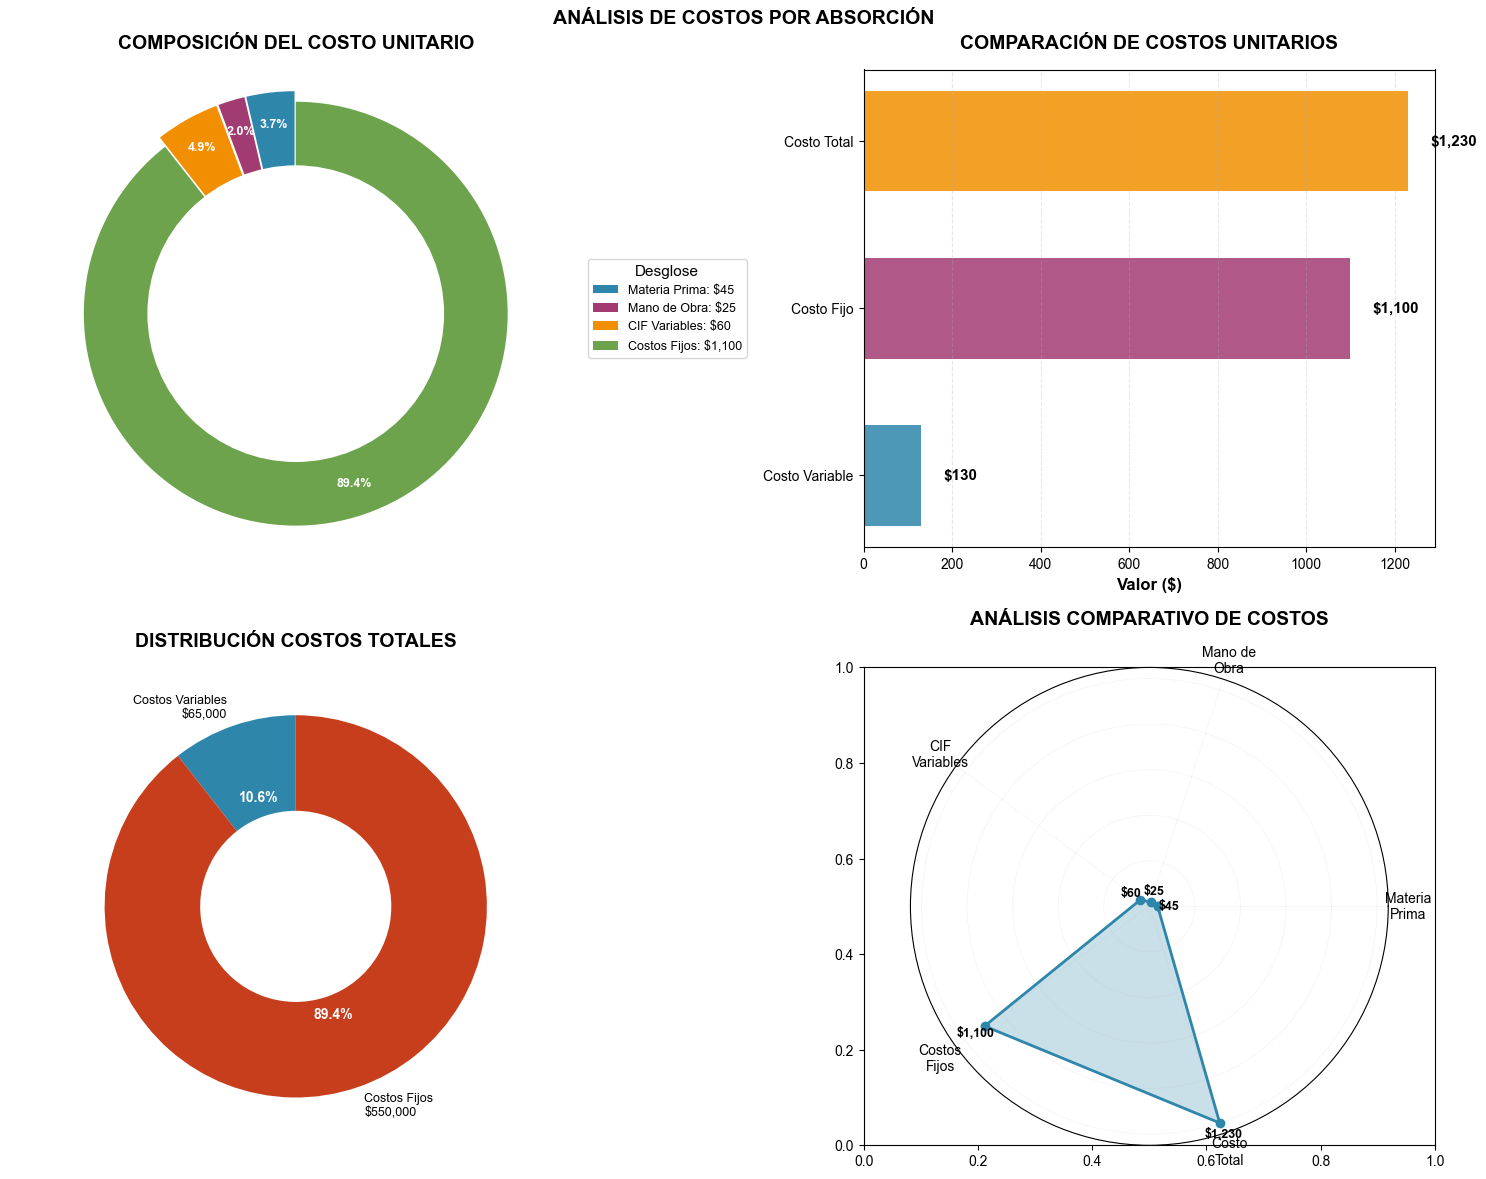

In [73]:
# Configuración de estilo para los gráficos
plt.style.use('default')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 11,
    'font.family': 'Arial',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.titlepad': 15,
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'figure.titleweight': 'bold'
})

# Paleta de colores profesional
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6DA34D', '#5C4B9B']
colors_light = ['#6BAED6', '#C76995', '#F8B85F', '#E27D66', '#9EC786', '#8E7CC3']


# GRÁFICO DE COMPOSICIÓN DEL COSTO UNITARIO

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig1.suptitle('ANÁLISIS DE COSTOS POR ABSORCIÓN', fontsize=14, fontweight='bold', y=0.98)

# Gráfico a: Composición del Costo Unitario (Donut elegante)
costos_detalle = [45, 25, 60, costo_fijo_unitario]
labels_detalle = ['Materia Prima', 'Mano de Obra', 'CIF Variables', 'Costos Fijos']
colores = [colors[0], colors[1], colors[2], colors[4]]

# Explode dinámico: resalta los segmentos pequeños
explode = [0.05 if v/sum(costos_detalle) < 0.25 else 0 for v in costos_detalle]

wedges, texts, autotexts = ax1.pie(
    costos_detalle,
    explode=explode,
    labels=labels_detalle,
    colors=colores,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize': 9, 'weight': 'bold', 'color': 'white'}
)

# Círculo central para efecto donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(centre_circle)

# Título
ax1.set_title('COMPOSICIÓN DEL COSTO UNITARIO', pad=15, fontweight='bold')

# Leyenda con valores absolutos
leyenda_labels = [f'{label}: ${val:,.0f}' for label, val in zip(labels_detalle, costos_detalle)]
ax1.legend(wedges, leyenda_labels, title="Desglose", loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

# Mantener aspecto circular
ax1.axis('equal')


# Gráfico b: Comparación Costos Unitarios (Barras Horizontales)
categorias = ['Costo Variable', 'Costo Fijo', 'Costo Total']
valores = [costo_variable_unitario, costo_fijo_unitario, costo_absorcion_unitario]

bars = ax2.barh(categorias, valores, color=colors[:3], alpha=0.85, height=0.6)
ax2.set_title('COMPARACIÓN DE COSTOS UNITARIOS', pad=15)
ax2.set_xlabel('Valor ($)')
ax2.xaxis.grid(True, alpha=0.3, linestyle='--')

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 50, bar.get_y() + bar.get_height()/2, 
             f'${valores[i]:,.0f}', ha='left', va='center', fontweight='bold')

# Gráfico c: Proporción Costos Fijos vs Variables (Donut)
costos_totales = [costo_variable_unitario * datos_absorcion['unidades_fabricadas'], 
                  datos_absorcion['costos_estructura_mensuales']]
etiquetas_totales = [f'Costos Variables\n${costos_totales[0]:,.0f}', 
                    f'Costos Fijos\n${costos_totales[1]:,.0f}']

wedges, texts, autotexts = ax3.pie(costos_totales, labels=etiquetas_totales, autopct='%1.1f%%',
                                   colors=[colors[0], colors[3]], startangle=90,
                                   wedgeprops=dict(width=0.5), textprops={'fontsize': 9})

ax3.set_title('DISTRIBUCIÓN COSTOS TOTALES', pad=15)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Gráfico d: Análisis de Estructura de Costos (Radar)
ax4 = fig1.add_subplot(224, polar=True)
categorias_radar = ['Materia\nPrima', 'Mano de\nObra', 'CIF\nVariables', 'Costos\nFijos', 'Costo\nTotal']
valores_radar = [45, 25, 60, costo_fijo_unitario, costo_absorcion_unitario]
valores_normalizados = [v/max(valores_radar) for v in valores_radar]

valores_normalizados += valores_normalizados[:1]
angles = np.linspace(0, 2*np.pi, len(categorias_radar), endpoint=False).tolist()
angles += angles[:1]

ax4.plot(angles, valores_normalizados, 'o-', linewidth=2, color=colors[0], markersize=6)
ax4.fill(angles, valores_normalizados, alpha=0.25, color=colors[0])
ax4.set_thetagrids(np.degrees(angles[:-1]), categorias_radar)
ax4.set_title('ANÁLISIS COMPARATIVO DE COSTOS', pad=15)
ax4.grid(True, alpha=0.15, linewidth=0.5)  # más tenue
ax4.set_yticklabels([])

# Añadir valores en puntos del radar
for i, (angle, value) in enumerate(zip(angles[:-1], valores_normalizados[:-1])):
    ax4.text(angle, value + 0.05, f'${valores_radar[i]:,.0f}', ha='center', va='center', 
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

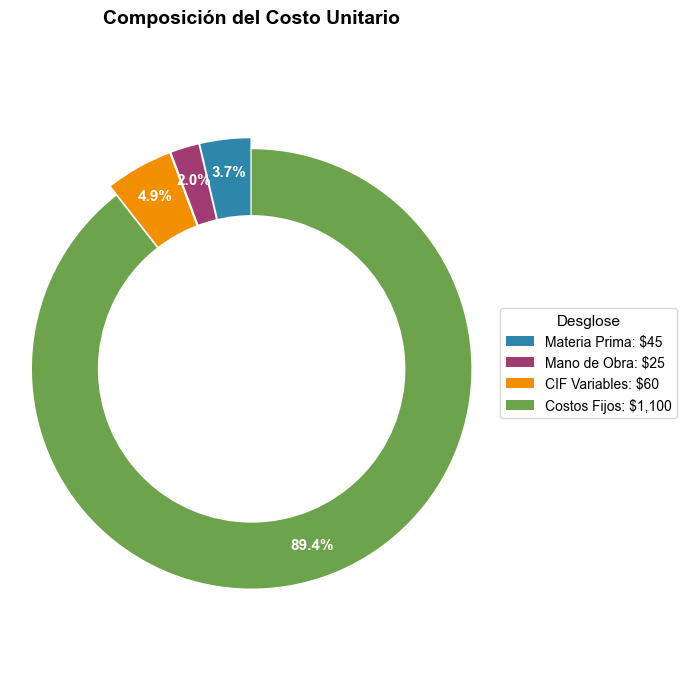

In [68]:
# =============================================================================
# 1. GRÁFICO DE COMPOSICIÓN DEL COSTO UNITARIO (Donut estilo elegante)
# =============================================================================
costos_detalle = [45, 25, 60, costo_fijo_unitario]
labels_detalle = ['Materia Prima', 'Mano de Obra', 'CIF Variables', 'Costos Fijos']
colores = ['#2E86AB', '#A23B72', '#F18F01', '#6DA34D']
explode = [0.05 if v/sum(costos_detalle) < 0.25 else 0 for v in costos_detalle]  # explode dinámico

fig, ax = plt.subplots(figsize=(7, 7))

# Crear donut
wedges, texts, autotexts = ax.pie(
    costos_detalle, 
    explode=explode, 
    labels=labels_detalle, 
    colors=colores,
    autopct='%1.1f%%', 
    startangle=90, 
    pctdistance=0.85,
    textprops={'fontsize': 11, 'color': 'white', 'weight': 'bold'}
)

# Círculo central para efecto donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Título
ax.set_title('Composición del Costo Unitario', fontsize=14, fontweight='bold', pad=20)

# Leyenda con valores absolutos
leyenda_labels = [f'{label}: ${val:,.0f}' for label, val in zip(labels_detalle, costos_detalle)]
ax.legend(wedges, leyenda_labels, title="Desglose", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ajustar aspecto
ax.axis('equal')
plt.tight_layout()
plt.show()
